EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [5]:
new_cols = [f'X{i}' for i in range(1, len(df.columns))]
new_cols = np.array(['Y'] + new_cols)
old_cols = df.columns

df.columns = new_cols

df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
df[['Y', 'X85', 'X94']].value_counts()

Y  X85  X94
0  0    1      6597
1  0    1       214
   1    1         6
0  1    1         2
Name: count, dtype: int64

In [7]:
df.Y = df.Y.astype('category')
df.X85 = df.X85.astype('category')
df.X94 = df.X94.astype('category')

In [8]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X84,X86,X87,X88,X89,X90,X91,X92,X93,X95
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.031506,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.030845,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.018034,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.027597,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.038375,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       6819 non-null   category
 1   X1      6819 non-null   float64 
 2   X2      6819 non-null   float64 
 3   X3      6819 non-null   float64 
 4   X4      6819 non-null   float64 
 5   X5      6819 non-null   float64 
 6   X6      6819 non-null   float64 
 7   X7      6819 non-null   float64 
 8   X8      6819 non-null   float64 
 9   X9      6819 non-null   float64 
 10  X10     6819 non-null   float64 
 11  X11     6819 non-null   float64 
 12  X12     6819 non-null   float64 
 13  X13     6819 non-null   float64 
 14  X14     6819 non-null   float64 
 15  X15     6819 non-null   float64 
 16  X16     6819 non-null   float64 
 17  X17     6819 non-null   float64 
 18  X18     6819 non-null   float64 
 19  X19     6819 non-null   float64 
 20  X20     6819 non-null   float64 
 21  X21     6819 n

In [10]:
numerical_features = df.select_dtypes(include = ['number']).columns
numerical_features

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81',
       'X82', 'X83', 'X84', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92',
       'X93', 'X95'],
      dtype='object')

In [11]:
categorical_features = df.drop(columns=['Y']).select_dtypes(include = ['category']).columns
categorical_features

Index(['X85', 'X94'], dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

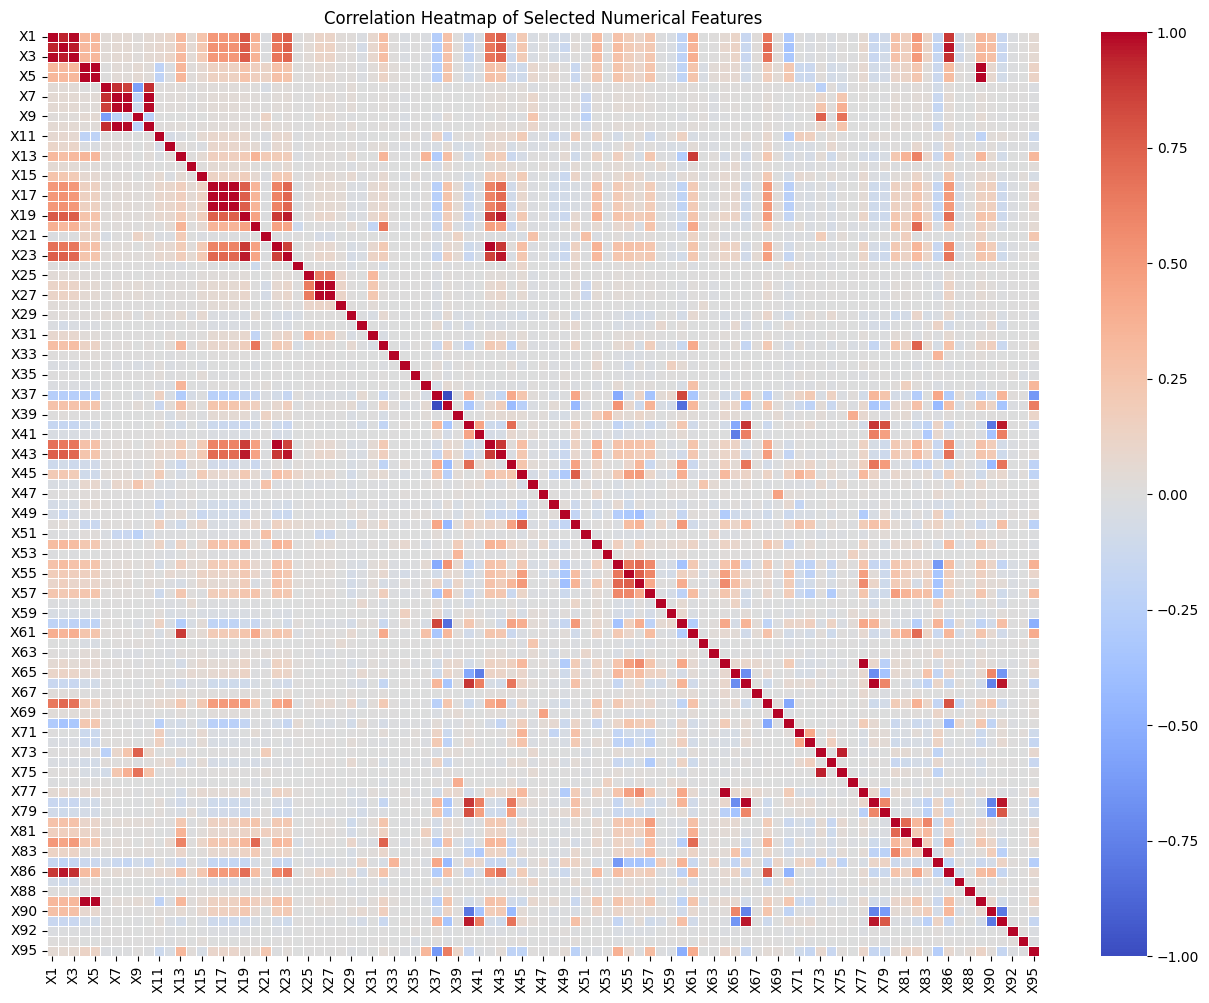

In [13]:
plt.figure(figsize=(16,12))

# Compute the correlation matrix for numerical features only
correlation_matrix_numerical = df[numerical_features].corr()

# Plot the heatmap for numerical features
sns.heatmap(correlation_matrix_numerical, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

In [14]:
correlation_matrix = df[numerical_features].corr().abs()

high_correlation_drop = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # remove highly related columns i.e, > 0.60
        if correlation_matrix.iloc[i, j] > 0.70:
            feature_name = correlation_matrix.columns[i]
            if feature_name not in high_correlation_drop:
                high_correlation_drop.append(feature_name)

numerical_features_reduced = [feature for feature in numerical_features if feature not in high_correlation_drop]

numerical_features_reduced

['X1',
 'X4',
 'X6',
 'X9',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X20',
 'X21',
 'X24',
 'X25',
 'X26',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X39',
 'X40',
 'X41',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X57',
 'X58',
 'X59',
 'X62',
 'X63',
 'X64',
 'X67',
 'X69',
 'X70',
 'X71',
 'X72',
 'X74',
 'X76',
 'X80',
 'X83',
 'X84',
 'X87',
 'X88',
 'X92',
 'X93',
 'X95']

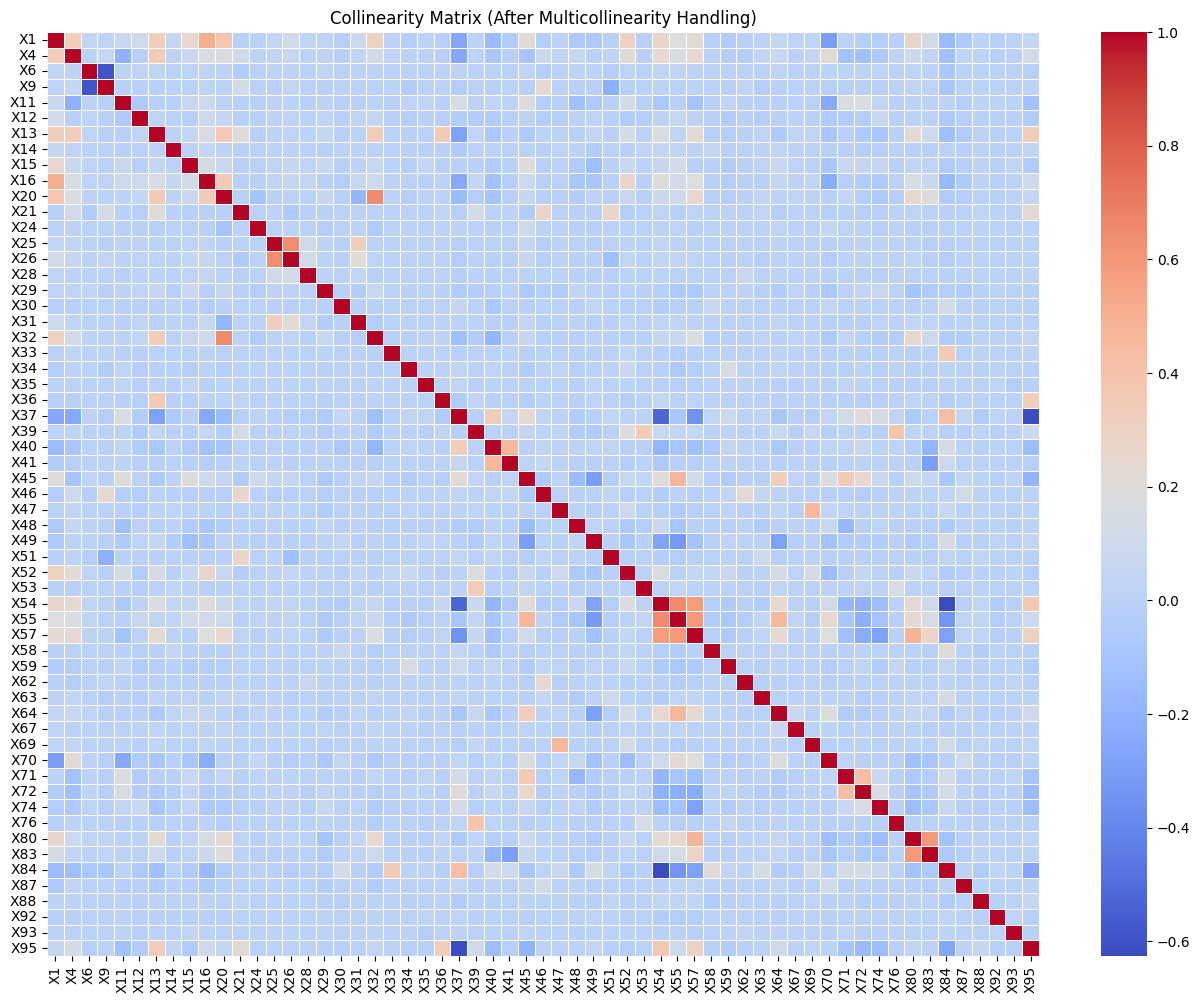

In [15]:
# Compute the correlation matrix for the reduced set of features (after handling multicollinearity)
collinearity_matrix = df[numerical_features_reduced].corr()

# Set figure size for better visibility
plt.figure(figsize=(16,12))

# Plot the collinearity matrix as a heatmap
sns.heatmap(collinearity_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Collinearity Matrix (After Multicollinearity Handling)')
plt.show()


In [16]:
print(len(numerical_features_reduced))

59
